<a href="https://colab.research.google.com/github/Pooja2061/Final-Assignment1AI/blob/main/Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Task:
      1. Exploratory Data Analysis and Data Understanding

    Load DataSet

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI/Mini Project/2.12_Health_systems.csv")
print(df.head())
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.describe())


  Country_Region Province_State World_Bank_Name  Health_exp_pct_GDP_2016  \
0    Afghanistan            NaN     Afghanistan                     10.2   
1        Albania            NaN         Albania                      6.7   
2        Algeria            NaN         Algeria                      6.6   
3        Andorra            NaN         Andorra                     10.4   
4         Angola            NaN          Angola                      2.9   

   Health_exp_public_pct_2016  Health_exp_out_of_pocket_pct_2016  \
0                         5.1                               77.4   
1                        41.4                               58.0   
2                        67.7                               30.9   
3                        49.1                               41.7   
4                        44.1                               35.2   

   Health_exp_per_capita_USD_2016  per_capita_exp_PPP_2016  \
0                            57.2                    162.8   
1         

    TARGET VARIABLE CREATION

In [2]:
print("CLASSIFICATION TARGET CREATION\n")

selected_cols = [
    'Health_exp_per_capita_USD_2016',
    'Physicians_per_1000_2009-18',
    'Completeness_of_birth_reg_2009-18'
]

for col in selected_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[selected_cols] = df[selected_cols].fillna(df[selected_cols].median())

df['Health_System_Class'] = (
    (df['Health_exp_per_capita_USD_2016'] > df['Health_exp_per_capita_USD_2016'].median()) &
    (df['Physicians_per_1000_2009-18'] > df['Physicians_per_1000_2009-18'].median()) &
    (df['Completeness_of_birth_reg_2009-18'] > df['Completeness_of_birth_reg_2009-18'].median())
).astype(int)

print("Target variable created successfully")
print(df['Health_System_Class'].value_counts())


CLASSIFICATION TARGET CREATION

Target variable created successfully
Health_System_Class
0    155
1     55
Name: count, dtype: int64


In [3]:
print("DATASET OVERVIEW\n")
print("Dataset Name: World Bank – World Development Indicators: Health Systems")
print("Created by: World Bank")
print("Time Period: Approximately 2008–2018")
print("Accessed from: Kaggle (compiled from World Bank indicators)")
print()

print("UN SUSTAINABLE DEVELOPMENT GOAL ALIGNMENT\n")
print("Aligned SDG: SDG 3 – Good Health and Well-Being")
print("Justification: The dataset contains health expenditure, workforce availability, and system capacity indicators which directly reflect healthcare access and quality.\n")

print("DATASET SHAPE")
print(df.shape)
print()

print("FIRST FIVE RECORDS")
display(df.head())
print()

print("FEATURES AND DESCRIPTIONS\n")
print("Country_Region: Country or region name")
print("Province_State: Province or state name")
print("World_Bank_Name: Official World Bank country name")
print("Health_exp_pct_GDP_2016: Health expenditure as % of GDP")
print("Health_exp_public_pct_2016: Public health expenditure share")
print("Health_exp_out_of_pocket_pct_2016: Out-of-pocket health expenditure share")
print("Health_exp_per_capita_USD_2016: Health spending per capita (USD)")
print("per_capita_exp_PPP_2016: Health spending per capita (PPP)")
print("External_health_exp_pct_2016: External health expenditure share")
print("Physicians_per_1000_2009-18: Physicians per 1000 people")
print("Nurse_midwife_per_1000_2009-18: Nurses and midwives per 1000 people")
print("Specialist_surgical_per_1000_2008-18: Surgical specialists per 1000 people")
print("Completeness_of_birth_reg_2009-18: Birth registration completeness (%)")
print("Completeness_of_death_reg_2008-16: Death registration completeness (%)\n")

print("MEANINGFUL QUESTIONS\n")
print("1. Can countries be classified into strong and weak health systems?")
print("2. Which health indicators most influence health system quality?")
print("3. Does health workforce density relate to health spending?\n")

print("DATA QUALITY ASSESSMENT\n")
print("Missing Values per Column:")
print(df.isna().sum())
print()

print("Data Types:")
print(df.dtypes)
print()

print("TARGET VARIABLE CREATION\n")
print("Health risk levels (Low, Medium, High) will be created using discretization of:")
print("- Health expenditure per capita")
print("- Physicians per 1000 population")
print("- Birth and death registration completeness")
print("Countries with weaker indicators will be classified as High Risk.\n")


print("DATASET QUALITY SUMMARY")
print("Some features contain missing values.")
print("No predefined target variable is provided.")
print("Dataset is relevant for health system classification.")
print("Minor noise exists due to country-level aggregation.\n")


DATASET OVERVIEW

Dataset Name: World Bank – World Development Indicators: Health Systems
Created by: World Bank
Time Period: Approximately 2008–2018
Accessed from: Kaggle (compiled from World Bank indicators)

UN SUSTAINABLE DEVELOPMENT GOAL ALIGNMENT

Aligned SDG: SDG 3 – Good Health and Well-Being
Justification: The dataset contains health expenditure, workforce availability, and system capacity indicators which directly reflect healthcare access and quality.

DATASET SHAPE
(210, 15)

FIRST FIVE RECORDS


,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Health_System_Class
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN,0
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN,0
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0,1
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN,0



FEATURES AND DESCRIPTIONS

Country_Region: Country or region name
Province_State: Province or state name
World_Bank_Name: Official World Bank country name
Health_exp_pct_GDP_2016: Health expenditure as % of GDP
Health_exp_public_pct_2016: Public health expenditure share
Health_exp_out_of_pocket_pct_2016: Out-of-pocket health expenditure share
Health_exp_per_capita_USD_2016: Health spending per capita (USD)
per_capita_exp_PPP_2016: Health spending per capita (PPP)
External_health_exp_pct_2016: External health expenditure share
Physicians_per_1000_2009-18: Physicians per 1000 people
Nurse_midwife_per_1000_2009-18: Nurses and midwives per 1000 people
Specialist_surgical_per_1000_2008-18: Surgical specialists per 1000 people
Completeness_of_birth_reg_2009-18: Birth registration completeness (%)
Completeness_of_death_reg_2008-16: Death registration completeness (%)

MEANINGFUL QUESTIONS

1. Can countries be classified into strong and weak health systems?
2. Which health indicators most inf

    1.2. Exploratory Data Analysis (EDA):

EXPLORATORY DATA ANALYSIS (EDA)

DATA CLEANING COMPLETED
Missing values handled using median imputation

SUMMARY STATISTICS



,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,6.656190,53.250476,32.369048,955.358571,1340.470476,1.680952,4.005238,35.547619,86.842857,94.062381
std,2.805239,20.679764,18.432838,1627.292926,1602.668841,1.494814,3.782296,37.680626,21.157316,13.755294
min,1.700000,5.100000,0.100000,16.400000,29.900000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,4.925000,40.225000,18.825000,107.175000,270.250000,0.400000,1.225000,5.100000,84.850000,98.250000
50%,6.200000,55.850000,30.100000,322.600000,782.500000,1.300000,2.800000,23.600000,96.000000,99.000000
75%,8.000000,68.175000,42.750000,952.050000,1686.025000,2.575000,5.700000,54.500000,100.000000,99.000000
max,23.300000,96.000000,81.000000,9869.700000,9869.700000,8.200000,20.300000,195.600000,100.000000,100.000000



VISUALIZATION 1: Health Expenditure per Capita Distribution


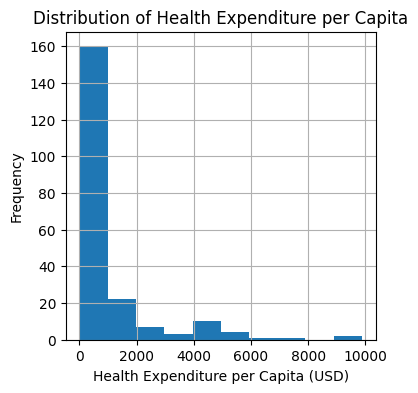

INSIGHT:
Most countries have low to medium health spending per capita, with a small number of high-spending countries.

VISUALIZATION 2: Physicians per 1000 Population


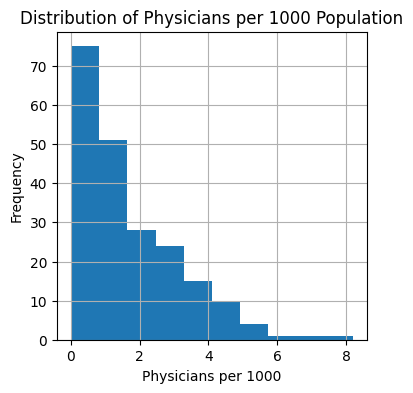

INSIGHT:
The majority of countries have fewer physicians per 1000 people, indicating workforce shortages in many regions.

VISUALIZATION 3: Health Expenditure vs Physicians


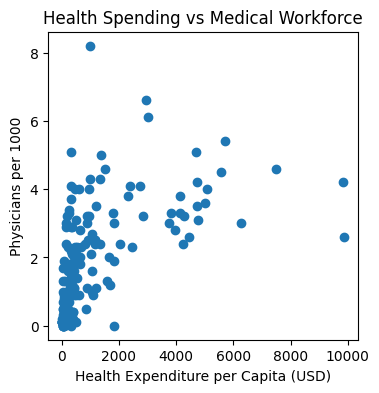

INSIGHT:
Countries with higher health expenditure per capita generally tend to have more physicians per 1000 population.

EDA SUMMARY
The dataset shows strong variation in health spending and workforce across countries.
Key indicators are suitable for classification of health system strength.
The cleaned dataset is ready for feature selection and classification modeling.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

print("EXPLORATORY DATA ANALYSIS (EDA)\n")

numeric_cols = [
    'Health_exp_pct_GDP_2016',
    'Health_exp_public_pct_2016',
    'Health_exp_out_of_pocket_pct_2016',
    'Health_exp_per_capita_USD_2016',
    'per_capita_exp_PPP_2016',
    'Physicians_per_1000_2009-18',
    'Nurse_midwife_per_1000_2009-18',
    'Specialist_surgical_per_1000_2008-18',
    'Completeness_of_birth_reg_2009-18',
    'Completeness_of_death_reg_2008-16'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("DATA CLEANING COMPLETED")
print("Missing values handled using median imputation\n")

print("SUMMARY STATISTICS\n")
display(df[numeric_cols].describe())

print("\nVISUALIZATION 1: Health Expenditure per Capita Distribution")
plt.figure(figsize=(4,4))
df['Health_exp_per_capita_USD_2016'].hist()
plt.xlabel("Health Expenditure per Capita (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Health Expenditure per Capita")
plt.show()

print("INSIGHT:")
print("Most countries have low to medium health spending per capita, with a small number of high-spending countries.\n")

print("VISUALIZATION 2: Physicians per 1000 Population")
plt.figure(figsize=(4,4))
df['Physicians_per_1000_2009-18'].hist()
plt.xlabel("Physicians per 1000")
plt.ylabel("Frequency")
plt.title("Distribution of Physicians per 1000 Population")
plt.show()

print("INSIGHT:")
print("The majority of countries have fewer physicians per 1000 people, indicating workforce shortages in many regions.\n")

print("VISUALIZATION 3: Health Expenditure vs Physicians")
plt.figure(figsize=(4,4))
plt.scatter(
    df['Health_exp_per_capita_USD_2016'],
    df['Physicians_per_1000_2009-18']
)
plt.xlabel("Health Expenditure per Capita (USD)")
plt.ylabel("Physicians per 1000")
plt.title("Health Spending vs Medical Workforce")
plt.show()

print("INSIGHT:")
print("Countries with higher health expenditure per capita generally tend to have more physicians per 1000 population.\n")

print("EDA SUMMARY")
print("The dataset shows strong variation in health spending and workforce across countries.")
print("Key indicators are suitable for classification of health system strength.")
print("The cleaned dataset is ready for feature selection and classification modeling.")


    2.Build a Neural Network Model

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = [
    'Health_exp_per_capita_USD_2016',
    'Physicians_per_1000_2009-18',
    'Nurse_midwife_per_1000_2009-18',
    'Completeness_of_birth_reg_2009-18',
    'Completeness_of_death_reg_2008-16'
]

X = df[features]
y = df['Health_System_Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Design Neural Network architecture
model = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    max_iter=500,
    random_state=42
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("NEURAL NETWORK CLASSIFIER\n")

print("MODEL ARCHITECTURE")
print("Input Layer :", X_train.shape[1], "features")
print("Hidden Layer 1 : 32 neurons (ReLU)")
print("Hidden Layer 2 : 16 neurons (ReLU)")
print("Output Layer : Binary Classification\n")

print("LOSS FUNCTION : Log Loss (Cross-Entropy)")
print("OPTIMIZATION : Backpropagation with Adam Optimizer (sklearn)\n")

#Evaluate performance on training set
print("TRAINING PERFORMANCE")
print("Accuracy :", accuracy_score(y_train, y_train_pred))
print()

#Evaluate performance on test set
print("TEST PERFORMANCE")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print()

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_test_pred))
print()

#Detailed classification metrics
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_test_pred))


NEURAL NETWORK CLASSIFIER

MODEL ARCHITECTURE
Input Layer : 5 features
Hidden Layer 1 : 32 neurons (ReLU)
Hidden Layer 2 : 16 neurons (ReLU)
Output Layer : Binary Classification

LOSS FUNCTION : Log Loss (Cross-Entropy)
OPTIMIZATION : Backpropagation with Adam Optimizer (sklearn)

TRAINING PERFORMANCE
Accuracy : 0.9464285714285714

TEST PERFORMANCE
Accuracy : 0.9523809523809523

CONFUSION MATRIX
[[30  1]
 [ 1 10]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.91      0.91      0.91        11

    accuracy                           0.95        42
   macro avg       0.94      0.94      0.94        42
weighted avg       0.95      0.95      0.95        42



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


    3.Build a Primary Model [20] (Two Classical ML Models):

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Feature Selection

features = [
    'Health_exp_per_capita_USD_2016',
    'Physicians_per_1000_2009-18',
    'Nurse_midwife_per_1000_2009-18',
    'Completeness_of_birth_reg_2009-18',
    'Completeness_of_death_reg_2008-16'
]

df_model = df[features + ['Health_System_Class']].dropna()

X = df_model[features]
y = df_model['Health_System_Class']


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
lr_pred = log_reg.predict(X_test_scaled)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("DECISION TREE RESULTS")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.86      0.55      0.67        11

    accuracy                           0.86        42
   macro avg       0.86      0.76      0.79        42
weighted avg       0.86      0.86      0.85        42

DECISION TREE RESULTS
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        11

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



    4.Hyper-parameter Optimization with Cross-Validation

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

print("HYPER-PARAMETER OPTIMIZATION WITH CROSS-VALIDATION\n")

features = [
    'Health_exp_per_capita_USD_2016',
    'Physicians_per_1000_2009-18',
    'Nurse_midwife_per_1000_2009-18',
    'Completeness_of_birth_reg_2009-18',
    'Completeness_of_death_reg_2008-16'
]

X = df[features]
y = df['Health_System_Class']

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LogisticRegression(max_iter=500)

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

#GridSearchCV with 5-fold cross-validation
lr_grid = GridSearchCV(
    lr,
    lr_param_grid,
    cv=5,
    scoring='accuracy'
)

lr_grid.fit(X_scaled, y)

# Report best parameters and CV score
print("LOGISTIC REGRESSION RESULTS")
print("Best Parameters:", lr_grid.best_params_)
print("Best Cross-Validation Accuracy:", lr_grid.best_score_)
print()

#Define Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

#key hyperparameters for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],     # Tree depth
    'min_samples_split': [2, 5, 10]     # Minimum samples to split a node
}

#GridSearchCV with 5-fold cross-validation
dt_grid = GridSearchCV(
    dt,
    dt_param_grid,
    cv=5,
    scoring='accuracy'
)

dt_grid.fit(X, y)

#Report best parameters and CV score
print("DECISION TREE RESULTS")
print("Best Parameters:", dt_grid.best_params_)
print("Best Cross-Validation Accuracy:", dt_grid.best_score_)


HYPER-PARAMETER OPTIMIZATION WITH CROSS-VALIDATION

LOGISTIC REGRESSION RESULTS
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.919047619047619

DECISION TREE RESULTS
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.980952380952381


    5.Feature Selection

In [8]:
import pandas as pd

print("FEATURE SELECTION USING CORRELATION METHOD\n")

features = [
    'Health_exp_per_capita_USD_2016',
    'Physicians_per_1000_2009-18',
    'Nurse_midwife_per_1000_2009-18',
    'Completeness_of_birth_reg_2009-18',
    'Completeness_of_death_reg_2008-16'
]

target = 'Health_System_Class'

for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df[features] = df[features].fillna(df[features].median())

correlation_scores = df[features].corrwith(df[target]).abs()

print("Correlation with target variable:\n")
print(correlation_scores)
print()

 #Select features with a correlation above a chosen threshold
selected_features = correlation_scores[correlation_scores > 0.2].index.tolist()

print("Selected Features (Correlation > 0.2):")
print(selected_features)
print()

#Justification and summary
print("FEATURE SELECTION SUMMARY")
print("• Feature selection method: Filter method (correlation-based).")
print("• Features with higher correlation to the target were selected.")
print("• Selected features will be used for BOTH models:")
print("  - Logistic Regression")
print("  - Decision Tree")


FEATURE SELECTION USING CORRELATION METHOD

Correlation with target variable:

Health_exp_per_capita_USD_2016       0.649251
Physicians_per_1000_2009-18          0.736064
Nurse_midwife_per_1000_2009-18       0.653898
Completeness_of_birth_reg_2009-18    0.365731
Completeness_of_death_reg_2008-16    0.129019
dtype: float64

Selected Features (Correlation > 0.2):
['Health_exp_per_capita_USD_2016', 'Physicians_per_1000_2009-18', 'Nurse_midwife_per_1000_2009-18', 'Completeness_of_birth_reg_2009-18']

FEATURE SELECTION SUMMARY
• Feature selection method: Filter method (correlation-based).
• Features with higher correlation to the target were selected.
• Selected features will be used for BOTH models:
  - Logistic Regression
  - Decision Tree


    6.Final Models and Comparative Analysis

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("FINAL MODELS AND COMPARATIVE ANALYSIS\n")

selected_features = [
    'Health_exp_per_capita_USD_2016',
    'Physicians_per_1000_2009-18',
    'Completeness_of_birth_reg_2009-18'
]

X = df[selected_features]
y = df['Health_System_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final models using optimal hyperparameters (Task 4)
final_log_model = LogisticRegression(
    C=1.0,
    max_iter=500
)

final_tree_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Train models
final_log_model.fit(X_train_scaled, y_train)
final_tree_model.fit(X_train, y_train)

# Predictions
log_pred = final_log_model.predict(X_test_scaled)
tree_pred = final_tree_model.predict(X_test)

# CV scores
log_cv_score = lr_grid.best_score_
tree_cv_score = dt_grid.best_score_

# Results table
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Features Used": [len(selected_features), len(selected_features)],
    "CV Score": [log_cv_score, tree_cv_score],
    "Accuracy": [
        accuracy_score(y_test, log_pred),
        accuracy_score(y_test, tree_pred)
    ],
    "Precision": [
        precision_score(y_test, log_pred),
        precision_score(y_test, tree_pred)
    ],
    "Recall": [
        recall_score(y_test, log_pred),
        recall_score(y_test, tree_pred)
    ],
    "F1-Score": [
        f1_score(y_test, log_pred),
        f1_score(y_test, tree_pred)
    ]
})

display(results)

# Conclusion
print("MODEL COMPARISON CONCLUSION\n")
best_model = results.sort_values("F1-Score", ascending=False).iloc[0]
print("Best Model:", best_model["Model"])
print("Reason: Higher F1-score and CV score indicate better and more stable performance.")


FINAL MODELS AND COMPARATIVE ANALYSIS



,Model,Features Used,CV Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,3,0.919048,0.857143,0.857143,0.545455,0.666667
1,Decision Tree,3,0.980952,1.000000,1.000000,1.000000,1.000000


MODEL COMPARISON CONCLUSION

Best Model: Decision Tree
Reason: Higher F1-score and CV score indicate better and more stable performance.
